In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('../data/Correlation Analysis Survey Form (Responses) - Form Responses 1.csv')

In [3]:
df.head()

,Timestamp,"In accordance with RA 10173 or the Data Privacy Act of 2012, all personal information gathered from this form shall be kept confidential and will only be accessed by the organizers for registration purposes.",Please indicate your student number.,Year Level,College,Course,How far is your house from UP Diliman? (in km),How long does it take you to study after class?
0,1/14/2024 12:05:47,Yes,2022-08894,2nd Year,College of Science,BS Geology,1.6,4
1,1/14/2024 12:11:10,Yes,2022-00937,2nd,College of Science,BS Biology,2.4,6
2,1/14/2024 12:54:31,Yes,2022-00266,II,College of Education,B Elementary Education,8.0,5
3,1/14/2024 13:16:12,Yes,2021-08957,II,College of Science,BS MBB,8.1,4
4,1/14/2024 15:04:41,Yes,2020-21181,4th year,College of Human Kinetics,B Sports Science,2.0,3


In [4]:
df.drop(['Timestamp', 'In accordance with RA 10173 or the Data Privacy Act of 2012, all personal information gathered from this form shall be kept confidential and will only be accessed by the organizers for registration purposes. '], axis=1, inplace=True)

In [5]:
df.columns

Index(['Please indicate your student number.', 'Year Level', 'College',
       'Course', 'How far is your house from UP Diliman? (in km)',
       'How long does it take you to study after class?'],
      dtype='object')

In [6]:
df.columns = ['Student Number', 'Year Level', 'College', 'Course', 'Distance', 'Time']

In [7]:
df_sorted = df.sort_values(by='Distance')

In [8]:
df['College'].unique()

array(['College of Science', 'College of Education ',
       'College of Human Kinetics', 'College of Home Economics',
       'College of Social Sciences and Philosophy',
       'College of Engineering', 'College of Architecture',
       'College of Education', 'Virata School of Business',
       'National College of Public Administration and Governance',
       'School of Economics ', 'College of Home Economics '], dtype=object)

In [9]:
df['College'] = df['College'].str.strip()

In [10]:
df['College'].unique()

array(['College of Science', 'College of Education',
       'College of Human Kinetics', 'College of Home Economics',
       'College of Social Sciences and Philosophy',
       'College of Engineering', 'College of Architecture',
       'Virata School of Business',
       'National College of Public Administration and Governance',
       'School of Economics'], dtype=object)

In [11]:
df.groupby('College').size()

College
College of Architecture                                     2
College of Education                                        2
College of Engineering                                      6
College of Home Economics                                   9
College of Human Kinetics                                   3
College of Science                                          7
College of Social Sciences and Philosophy                   2
National College of Public Administration and Governance    2
School of Economics                                         1
Virata School of Business                                   1
dtype: int64

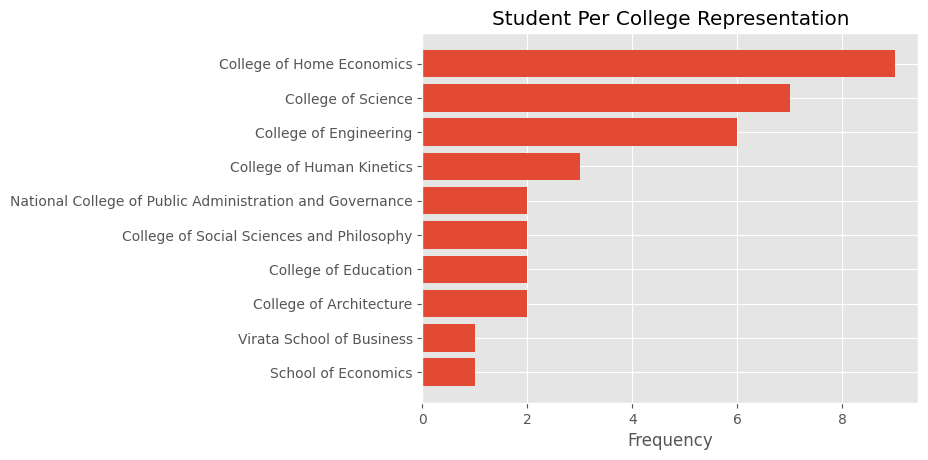

In [25]:
college_group = df.groupby(['College']).size().reset_index()
college_group.set_index('College', drop=True, inplace=True)
college_data = sorted(zip(college_group.index, df.groupby(['College']).size()), key=lambda x: x[1], reverse=False)
categs, values = zip(*college_data)
plt.barh(categs, values)
plt.xlabel("Frequency")
plt.title("Student Per College Representation")
plt.savefig('student per college rep.png')
plt.show()

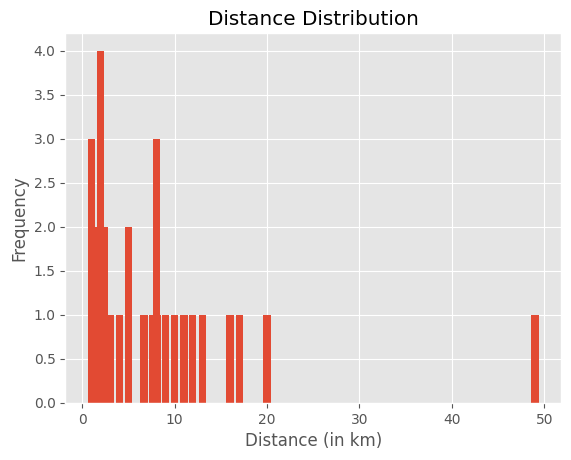

In [26]:
distance_group = df.groupby(['Distance']).size().reset_index()
distance_group.set_index('Distance', drop=True, inplace=True)
distance_data = sorted(zip(distance_group.index, df.groupby(['Distance']).size()), key=lambda x: x[1], reverse=False)
categs, values = zip(*distance_data)
plt.bar(categs, values)
plt.ylabel("Frequency")
plt.xlabel("Distance (in km)")
plt.title("Distance Distribution")
plt.savefig('distance distribution.png')
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


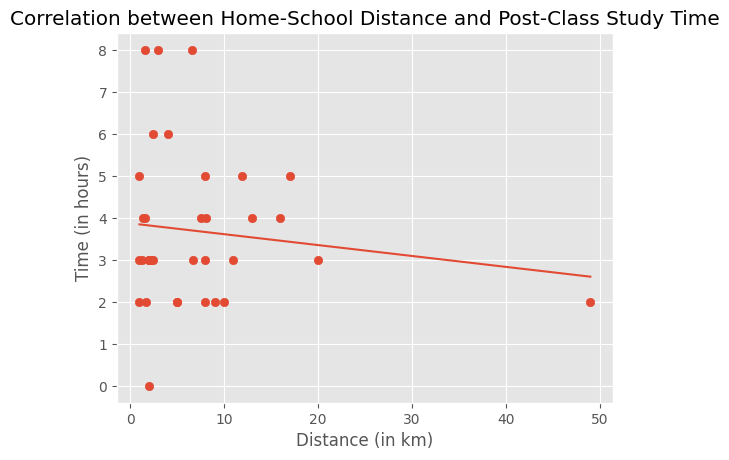

-0.02594721130384488 3.8728566938710305


In [34]:
plt.scatter(x=df['Distance'], y=df['Time'])
# plt.tight_layout(top=0.7)
plt.title('Correlation between Home-School Distance and Post-Class Study Time')
plt.xlabel('Distance (in km)')
plt.ylabel('Time (in hours)')

X = df[['Distance']]
y = df['Time']
model = LinearRegression()
model.fit(X, y)

X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_smooth = model.predict(X_smooth)
plt.plot(X_smooth, y_smooth)
plt.savefig('scatplot.png')
plt.show()
print(model.coef_[0], model.intercept_)